# Datenanalyse mit KI & Machine Learning
## K-Means (Unsupervised Learning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Datensatz laden:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


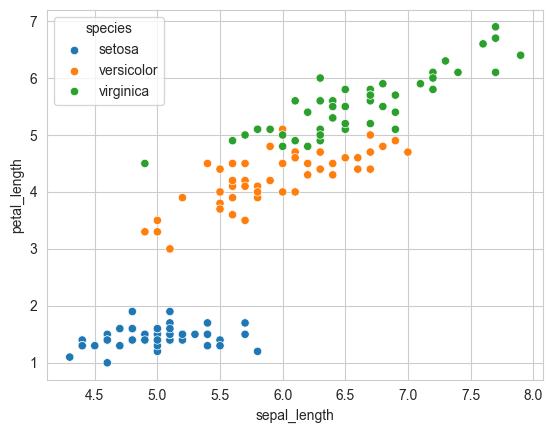

In [4]:
sns.scatterplot(
	data=iris,
	x='sepal_length',
	y='petal_length',
	hue='species'
)
plt.show()

In [5]:
# Tun wir mal so, als gäbe es die Info über die Spezies gar nicht!
unknown_iris = iris.drop('species', axis=1)
unknown_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


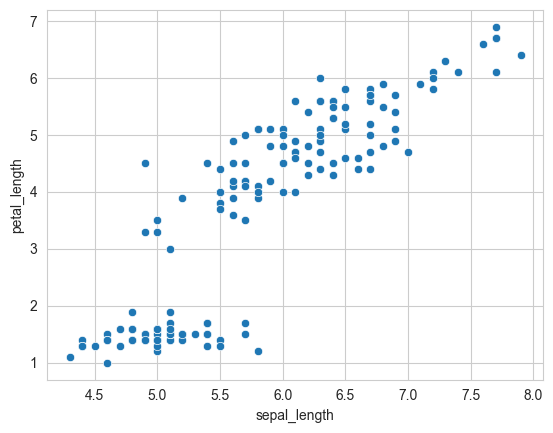

In [6]:
sns.scatterplot(data=unknown_iris, x='sepal_length', y='petal_length');

# K-Means hilft uns bei der Clustersuche!

So sieht K-Means-Clustering im Hintergrund aus: [>>>Video](https://www.youtube.com/watch?v=5I3Ei69I40s)

Und hier das Ganze auf einen Schlag: [>>>Bild](https://hockeygraphsdotcom.files.wordpress.com/2015/12/kmeans-process.png?w=615&h=405)


#### Der Prozess:

1. Es werden am Anfang <b>zufällig</b> die k Cluster-Zentren initialisiert und ihnen die nächsten Punkte zugeordnet (Parameter hierfür: n_clusters). (Die Zuordnung ist ganz simpel: Ein Punkt gehört zu dem Cluster, zu dem sein Abstand am geringsten ist.)


2. Dann werden die Cluster-Zentren neu errechnet und zwar als Mittelwert aller Punkte, die dem jeweiligen Cluster 
zugeordnet wurden, wodurch sich die Clusterzentren von ihrer vorigen Position verschieben.


3. Den neuen Cluster-Zentren werden wieder die nächsten Punkte zugeordnet und wieder die neuen 
Mittelwerte errechnet und als neue Cluster-Zentren gesetzt. (also wieder Schritt 1 und 2)


4. Dieser Prozess wiederholt sich so lange, bis sich der Wert der Cluster-Zentren nicht mehr ändert!


5. Damit dieser Prozess nicht per Zufall eine ungünstige Verteilung von Zentren würfelt, die keine guten Ergebnisse erbringt, wird das Modell einige Male mit unterschiedlichen Zufallswerten durchgerechnet (Parameter: n_init!).

Achtung: Clustering teilt die Daten zwar in Gruppen ein, aber diese Gruppen müssen nicht unbedingt auch sinnvoll sein!
Cluster besagen nur, dass zwischen den Punkten Ähnlichkeit besteht.

Dinge im selben Cluster müssen deshalb nicht vom gleichen "Typ" sein (wie etwa einer Schwertlilienart).

### Vorbereitung (Preprocessing) der Daten auf den Algorithmus

In [7]:
# Fehlen Werte?
unknown_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [8]:
unknown_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Range von petal_width
print(unknown_iris['petal_width'].min())
print(unknown_iris['petal_width'].max())
print("Range:", unknown_iris['petal_width'].max() - unknown_iris['petal_width'].min())

0.1
2.5
Range: 2.4


In [10]:
# Range von sepal_length
print(unknown_iris['sepal_length'].min())
print(unknown_iris['sepal_length'].max())
print("Range:", unknown_iris['sepal_length'].max() - unknown_iris['sepal_length'].min())

4.3
7.9
Range: 3.6000000000000005


In [11]:
# Die Spreizung der Werte auf den verschiedenen Variablen ist komplett unterschiedlich.
# Das ist ein Problem. Warum?
unknown_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Daten sind nicht skaliert --> MinMaxScaler (übrigens eine Feature-Engineering-Technik!)
# Mehr Infos: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# Dokumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
scaled_iris = scaler.fit_transform(unknown_iris)

In [13]:
# Alternativ mit getrenntem fit und transform (weniger performant):

# scaler = MinMaxScaler()
# scaler.fit(unknown_iris)
# unknown_iris = scaler.transform(unknown_iris)

In [14]:
# Jetzt sind alle Daten in den Bereich zwischen 0 und 1 "gebannt"
# Die Größenverhältnisse bleiben dabei erhalten!
scaled_iris

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [15]:
# Minimum und Maximum in einer bestimmten Spalte:
print("Min in Spalte 0:", scaled_iris[:, 0].min())
print("Max in Spalte 0:", scaled_iris[:, 0].max())

Min in Spalte 0: 0.0
Max in Spalte 0: 1.0


In [16]:
# Minimum im gesamten Datensatz:
scaled_iris.min()

np.float64(0.0)

In [17]:
# Maximum im gesamten Datensatz:
scaled_iris.max()

np.float64(1.0)

In [18]:
# MinMaxScaler gibt uns ein Numpy Array zurück
type(scaled_iris)

numpy.ndarray

In [19]:
# Wir "pandifizieren" das Array zurück:
scaled_iris = pd.DataFrame(
	scaled_iris,
	columns=unknown_iris.columns
)

scaled_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### Moooooment. Warum haben wir die Daten nicht gesplittet?

Bei K-Means handelt es sich um einen Algorithmus des unüberwachten Lernens. Wir trainieren den Algorithmus also, ohne selbst die Lösung zu kennen, sondern verwenden den Algorithmus, um eine Lösung zu finden. Ein Aufsplitten der Daten in X_train und X_test würde die Clusterfindung eher erschweren.

In [20]:
X = scaled_iris[["sepal_length", "petal_length"]]
X

,sepal_length,petal_length
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797
...,...,...
145,0.666667,0.711864
146,0.555556,0.677966
147,0.611111,0.711864
148,0.527778,0.745763


In [21]:
# KMeans Clustering durchführen --> unüberwachtes Lernen!
# n_clusters > Anzahl der Cluster, die gesucht werden (Default: 8)
# n_init  > Anzahl der Durchläufe des Algorithmus mit zufälliger Wahl der Clusterzentren (Default: 10)

kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [22]:
# Clusterzugehörigkeit in eine Spalte schreiben:
scaled_iris['klasse'] = kmeans.predict(X)
scaled_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,klasse
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [23]:
scaled_iris.klasse.unique()

array([1, 0], dtype=int32)

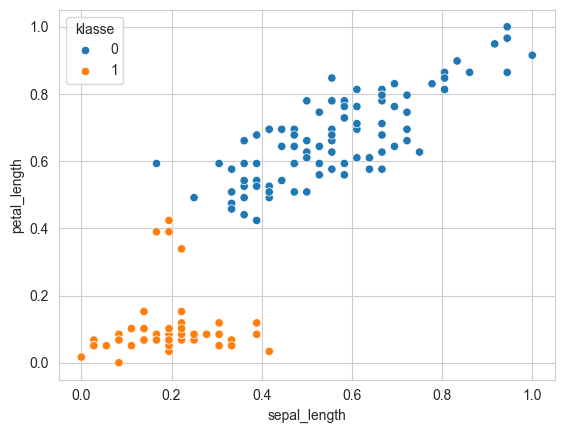

In [24]:
# Graphische Kontrolle:
sns.scatterplot(data=scaled_iris,
				x='sepal_length',
				y='petal_length',
				hue='klasse');

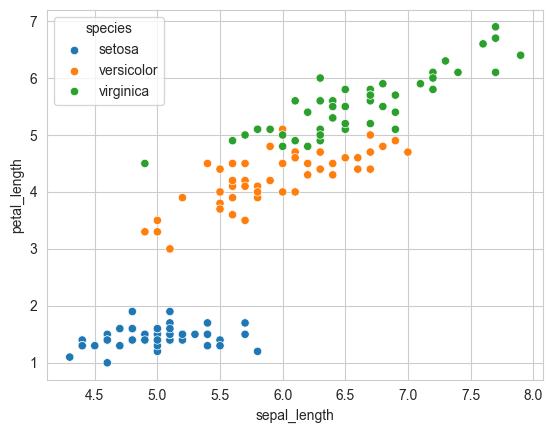

In [25]:
# Graphische Kontrolle mit Originaldaten:
sns.scatterplot(data=iris, x="sepal_length", y="petal_length", hue="species");

In [26]:
kmeans2 = KMeans(n_clusters=3, n_init=50)
kmeans2.fit(X)

KMeans(n_clusters=3, n_init=50)

In [27]:
# Labels mit Klassenzugehörigkeiten liegen auch in .labels_ vor:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [28]:
scaled_iris['klassen2'] = kmeans2.labels_

In [29]:
scaled_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,klasse,klassen2
0,0.222222,0.625000,0.067797,0.041667,1,1
1,0.166667,0.416667,0.067797,0.041667,1,1
2,0.111111,0.500000,0.050847,0.041667,1,1
3,0.083333,0.458333,0.084746,0.041667,1,1
4,0.194444,0.666667,0.067797,0.041667,1,1


In [30]:
scaled_iris['klassen2'].unique()

array([1, 2, 0], dtype=int32)

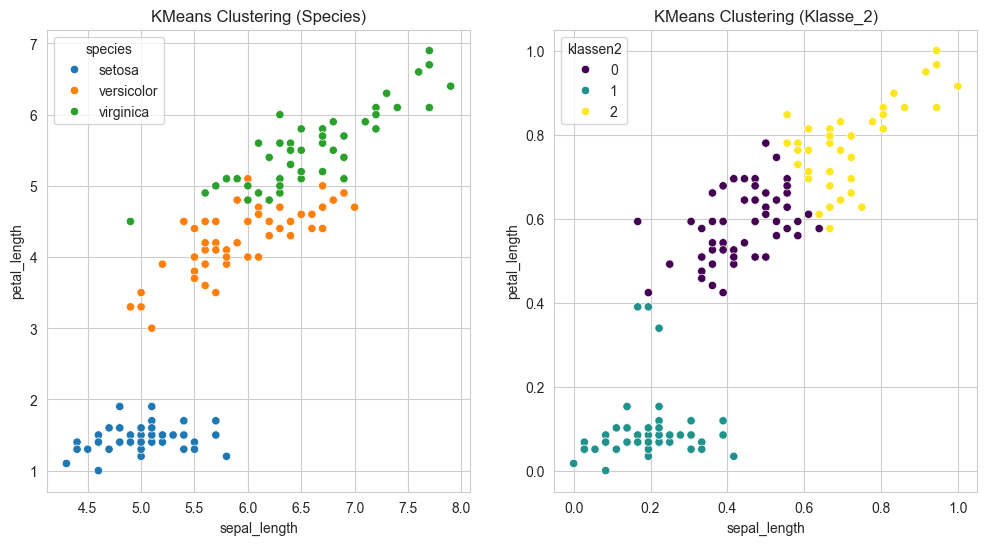

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
				ax=ax1)
sns.scatterplot(data=scaled_iris, x='sepal_length', y='petal_length',
				hue='klassen2', ax=ax2, palette='viridis')
ax1.set_title('KMeans Clustering (Species)')
ax2.set_title('KMeans Clustering (Klasse_2)')
plt.show()

In [32]:
# Clusterzentren ermitteln:
kmeans2.cluster_centers_

array([[0.43948413, 0.58898305],
       [0.19601677, 0.09497921],
       [0.71476965, 0.78296817]])

In [33]:
centers_df = pd.DataFrame(kmeans2.cluster_centers_)

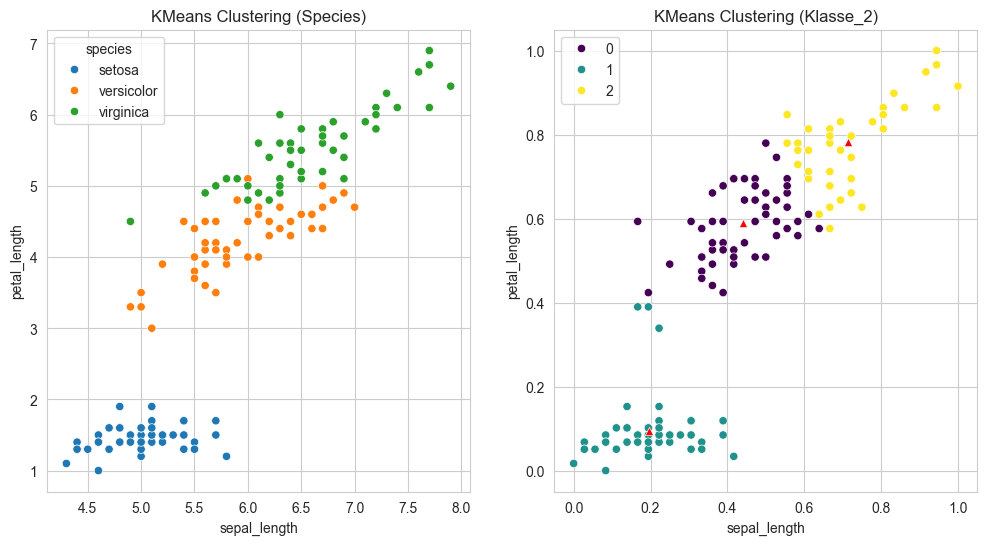

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',
				ax=ax1)
sns.scatterplot(data=scaled_iris, x='sepal_length', y='petal_length',
				hue='klassen2', ax=ax2, palette='viridis')
sns.scatterplot(data=centers_df, x=centers_df[0], y=centers_df[1],
				ax=ax2, color='red', marker='^')

ax1.set_title('KMeans Clustering (Species)')
ax2.set_title('KMeans Clustering (Klasse_2)')
plt.show()

# Übungsaufgabe: Führe ein Clustering dieser Zufallsdaten mit 5 Clustern durch!

## Beispiele mit Zufallsdaten

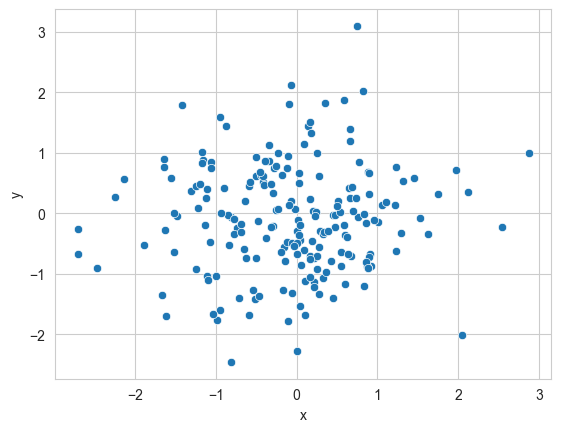

In [97]:
zufall = np.random.default_rng(seed=1)
x = zufall.normal(loc=0, scale=1, size=200)
y = zufall.normal(loc=0, scale=1, size=200)
df = pd.DataFrame({"x": x, "y": y})
sns.scatterplot(data=df, x="x", y="y")
plt.show()

In [98]:
# Look @ RNG_Data
rng_data = df
rng_data.describe()

,x,y
count,200.000000,200.000000
mean,-0.073662,-0.090483
std,0.926800,0.897611
min,-2.711285,-2.457564
25%,-0.659267,-0.699263
50%,0.002733,-0.113182
75%,0.547136,0.517508
max,2.871567,3.100042


In [107]:
# Create Params
noc = 5
noi = 20

# Perform KMeans clustering on RNG_Data
kmeans_rng = KMeans(n_clusters=noc, n_init=noi, random_state=42)
kmeans_rng.fit(rng_data)

KMeans(n_clusters=5, n_init=20, random_state=42)

In [112]:
# Clustercenters
cc = kmeans_rng.cluster_centers_
cc

array([[ 2.96430707e-01, -5.48296681e-01, -1.33226763e-15],
       [-1.33197962e-01,  1.10346864e+00,  3.00000000e+00],
       [ 1.20400563e+00,  2.27714294e-01,  2.00000000e+00],
       [-6.79323123e-01, -1.40383366e+00,  4.00000000e+00],
       [-1.28054111e+00,  1.19607220e-01,  1.00000000e+00]])

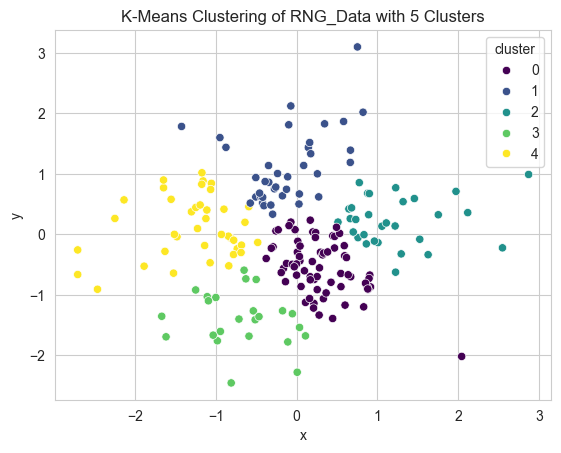

In [108]:
# Add cluster feature to dataframe
rng_data["cluster"] = kmeans_rng.labels_

# Plot results
sns.scatterplot(data=rng_data, x="x", y="y", hue="cluster", palette="viridis")
plt.title("K-Means Clustering of RNG_Data with 5 Clusters")
plt.show()

In [109]:
# Look @ RNG_Data
rng_data

,x,y,cluster
0,0.345584,1.828430,1
1,0.821618,2.020073,1
2,0.330437,-1.064771,0
3,-1.303157,0.372815,4
4,0.905356,-0.673302,0
...,...,...,...
195,-1.617467,-1.694992,3
196,1.109638,0.188743,2
197,0.168106,0.234578,0
198,0.548405,-0.865529,0


## Die Logik von k-Means teilt Daten nicht immer sinnvoll ein

## Clustering mit Kreisdaten

In [36]:
circles = make_circles(factor=0.4, random_state=1)

In [37]:
circles

(array([[-3.23606798e-01, -2.35114101e-01],
        [-1.70311717e-01, -3.61930821e-01],
        [-5.35826795e-01, -8.44327926e-01],
        [-2.91587451e-01, -2.73818842e-01],
        [ 2.54969596e-01, -3.08205297e-01],
        [-5.35826795e-01,  8.44327926e-01],
        [-1.87381315e-01, -9.82287251e-01],
        [-2.54969596e-01, -3.08205297e-01],
        [-2.91587451e-01,  2.73818842e-01],
        [-1.23606798e-01,  3.80422607e-01],
        [ 2.14330718e-01, -3.37731170e-01],
        [ 1.87381315e-01, -9.82287251e-01],
        [ 2.91587451e-01,  2.73818842e-01],
        [ 3.87433264e-01,  9.94759549e-02],
        [ 3.96845881e-01,  5.01332934e-02],
        [-6.37423990e-01, -7.70513243e-01],
        [-7.28968627e-01, -6.84547106e-01],
        [ 7.28968627e-01, -6.84547106e-01],
        [-3.71910594e-01, -1.47249821e-01],
        [ 3.09016994e-01,  9.51056516e-01],
        [ 9.68583161e-01,  2.48689887e-01],
        [-3.87433264e-01,  9.94759549e-02],
        [ 3.71910594e-01, -1.472

In [38]:
circle_data = circles[0]
circle_data

array([[-3.23606798e-01, -2.35114101e-01],
       [-1.70311717e-01, -3.61930821e-01],
       [-5.35826795e-01, -8.44327926e-01],
       [-2.91587451e-01, -2.73818842e-01],
       [ 2.54969596e-01, -3.08205297e-01],
       [-5.35826795e-01,  8.44327926e-01],
       [-1.87381315e-01, -9.82287251e-01],
       [-2.54969596e-01, -3.08205297e-01],
       [-2.91587451e-01,  2.73818842e-01],
       [-1.23606798e-01,  3.80422607e-01],
       [ 2.14330718e-01, -3.37731170e-01],
       [ 1.87381315e-01, -9.82287251e-01],
       [ 2.91587451e-01,  2.73818842e-01],
       [ 3.87433264e-01,  9.94759549e-02],
       [ 3.96845881e-01,  5.01332934e-02],
       [-6.37423990e-01, -7.70513243e-01],
       [-7.28968627e-01, -6.84547106e-01],
       [ 7.28968627e-01, -6.84547106e-01],
       [-3.71910594e-01, -1.47249821e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 9.68583161e-01,  2.48689887e-01],
       [-3.87433264e-01,  9.94759549e-02],
       [ 3.71910594e-01, -1.47249821e-01],
       [ 2.

In [39]:
circle_labels = circles[1]
circle_labels

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

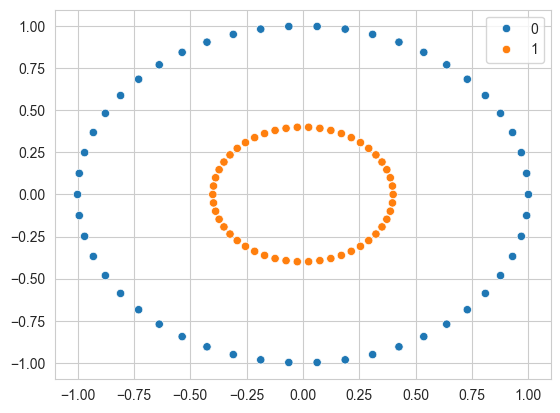

In [40]:
sns.scatterplot(x=circle_data[:, 0], y=circle_data[:, 1], hue=circle_labels)
plt.show()

In [41]:
# Mit KMeans Cluster finden:
circle_model = KMeans(n_clusters=2, n_init=10)
circle_model.fit(circle_data)

KMeans(n_clusters=2, n_init=10)

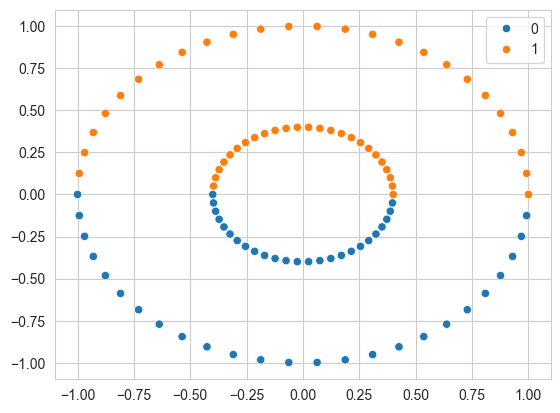

In [42]:
sns.scatterplot(x=circle_data[:, 0],
				y=circle_data[:, 1],
				hue=circle_model.labels_);

In [43]:
# In diesem Fall scheitert K-Means!

In [44]:
# "Lösungsangebot" ohne Vertiefung: DBScan als Clustering-Ansatz
# Zeigt: Die Wahl des richtigen Clustering-Algorithmus für die vorhandenen Daten ist immens wichtig!

In [45]:
dbs = DBSCAN()
dbs.fit(circle_data)

DBSCAN()

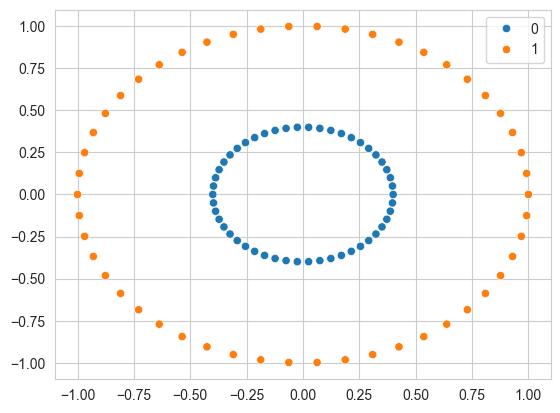

In [46]:
sns.scatterplot(x=circle_data[:, 0], y=circle_data[:, 1], hue=dbs.labels_)
plt.show()

## Die geeignete Anzahl von Clustern über Inertia herausfinden

In [47]:
clouds = pd.read_csv('ThreeClouds.csv')
clouds.head()

,x,y,klasse
0,2.386188,6.023557,1
1,3.709369,4.100193,1
2,0.328804,10.138075,3
3,4.453767,4.887419,1
4,4.667629,3.917231,1


In [48]:
# Fehlende Werte?
clouds.isna().sum()

x         0
y         0
klasse    0
dtype: int64

In [49]:
scaler = MinMaxScaler()
clouds[['x', 'y']] = scaler.fit_transform(clouds[['x', 'y']])
clouds.head()

,x,y,klasse
0,0.652708,0.529757,1
1,0.744686,0.369600,1
2,0.509693,0.872370,3
3,0.796432,0.435151,1
4,0.811298,0.354365,1


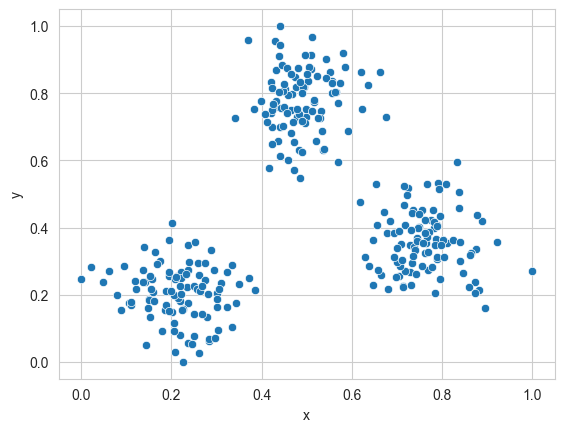

In [50]:
sns.scatterplot(data=clouds, x='x', y='y')
plt.show()

In [51]:
# Features definieren
X = clouds[["x", "y"]]

In [52]:
# Modell trainieren
model_clouds = KMeans(n_clusters=3, n_init=10)
model_clouds.fit(X)
cloud_predictions = model_clouds.predict(X)

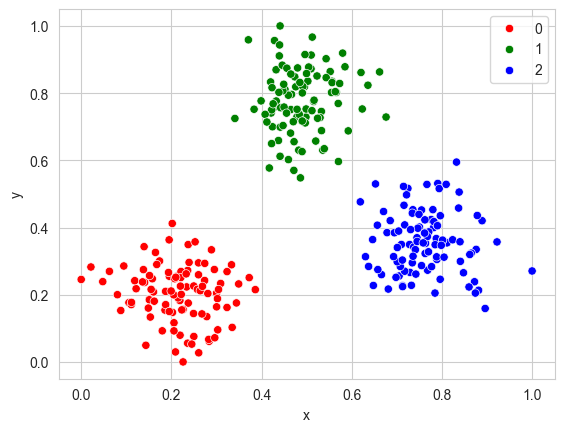

In [53]:
sns.scatterplot(data=clouds,
				x='x',
				y='y',
				hue=cloud_predictions,
				palette=['red', 'green', 'blue']);

In [54]:
model_clouds.inertia_

3.7882045192126137

### An sich scheinen die 3 Cluster die richtige Anzahl gewesen zu sein. Können wir das überprüfen?

In [113]:
# Inertia ist ein Maß für die Summe der quadrierten Abstände aller Punkte zu ihren nächsten Clusterzentren:
inertia_values = []

for i in range(1, 15):
	km = KMeans(n_clusters=i, n_init=10)
	km.fit(X)
	inertia_values.append(km.inertia_)

In [114]:
inertia_values

[36.3055627928313,
 16.293793376455824,
 3.7882045192126137,
 3.188981396665959,
 2.647823442983735,
 2.1907642767523576,
 1.9325218296297009,
 1.686982218325637,
 1.5168185151529758,
 1.383156700100118,
 1.2489068782986412,
 1.1351390621521327,
 1.0483052552169827,
 0.9615499627894978]

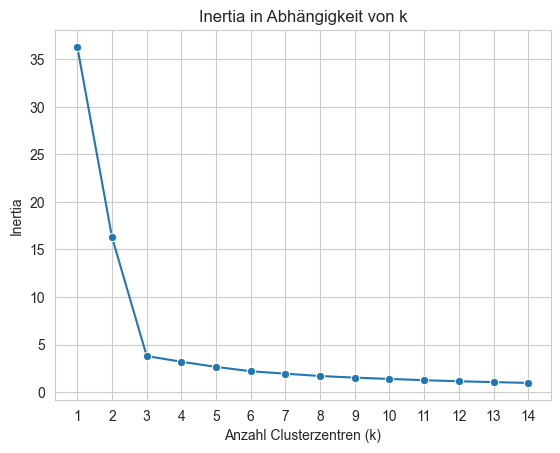

In [115]:
sns.lineplot(x=range(1, 15), y=inertia_values, marker='o')
plt.xticks(range(1, 15))
plt.title('Inertia in Abhängigkeit von k')
plt.xlabel('Anzahl Clusterzentren (k)')
plt.ylabel('Inertia')
plt.show()

In [58]:
# Der "Ellbogen" verrät uns, welche Anzahl an Clustern die beste für die Unterscheidung unserer Daten ist. Dort, wo sich die Inertia anschließend nicht mehr deutlich verringert, haben wir unsere beste Clusteranzahl gefunden. Hier: bei 3 Clustern.

In [59]:
# Quizfrage: Wir können mit der inertia bis zur Null gehen.
# Wann erreichen wir die Null? Und warum ist die entsprechende Anzahl Clusterzentren nicht wirklich sinnvoll?

# Übungsaufgabe 2: Back to iris!

### Nutze die neugelernten Infos über Inertia und prüfe die "richtige" Anzahl von Clustern im iris Datensatz!
### Dieses Mal mit allen features (sepal_length, sepal_width, petal_length, petal_width).

In [118]:
# Iris Data
unknown_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


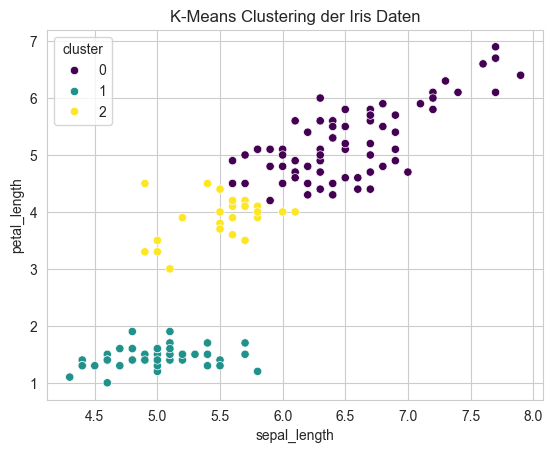

In [123]:
# Features definieren (alle Features des Iris Datensatzes)
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(unknown_iris)

# Clusterzugehörigkeit in eine Spalte schreiben
unknown_iris['cluster'] = kmeans.predict(unknown_iris)

# Visualisierung
sns.scatterplot(data=unknown_iris,
				x='sepal_length',
				y='petal_length',
				hue='cluster',
				palette='viridis')
plt.title('K-Means Clustering der Iris Daten')
plt.show()

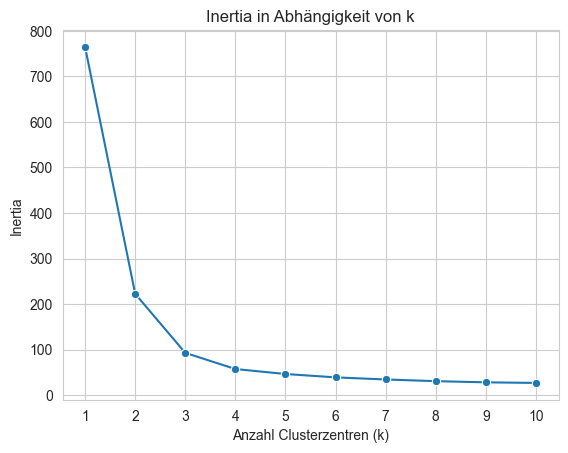

In [129]:
# Features definieren (alle Features des Iris Datensatzes)
X = unknown_iris.select_dtypes("number")

# Inertia für verschiedene Cluster-Anzahlen berechnen
inertia_values = []

for i in range(1, 11):
	kmeans = KMeans(n_clusters=i, n_init=10)
	kmeans.fit(X)
	inertia_values.append(kmeans.inertia_)

# Plot der Inertia-Werte
sns.lineplot(x=range(1, 11), y=inertia_values, marker='o')
plt.xticks(range(1, 11))
plt.title('Inertia in Abhängigkeit von k')
plt.xlabel('Anzahl Clusterzentren (k)')
plt.ylabel('Inertia')
plt.show()

In [130]:
inertia_values

[764.7039333333335,
 222.56076388888886,
 92.90406666666668,
 57.35804680232558,
 46.44618205128206,
 39.03998724608725,
 34.41242258610954,
 30.722014126224657,
 28.148744588744595,
 26.861734784823025]